In [2]:
import pandas as pd
import Graphics
import Knn
import Lowess
import ChooseParams

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Читаем и разбиваем датасет

In [3]:
data = pd.read_csv('games_data.csv')

x = data.drop('Rating', axis=1).to_numpy()
y = data['Rating'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Перебираем гиперпараметры и находим лучшие из них

In [4]:
best_params = ChooseParams.ChooseParams(x_train, y_train, x_test, y_test, x_val, y_val)

best_params = best_params.choose()

print(f"Parameters: {best_params[0]}")
print(f"Accuracy: {best_params[1]}")

[I 2024-11-12 17:59:21,490] A new study created in memory with name: no-name-44c26359-71cc-40c4-aed5-5bbf0ae98594
[I 2024-11-12 17:59:21,693] Trial 0 finished with value: 0.6132075471698113 and parameters: {'knn_metric': 'Minkowski_1', 'knn_kernel': 'General_1_2', 'use_k': False, 'r': 8.536897384779614}. Best is trial 0 with value: 0.6132075471698113.
[I 2024-11-12 17:59:21,893] Trial 1 finished with value: 0.5754716981132075 and parameters: {'knn_metric': 'Minkowski_2', 'knn_kernel': 'General_2_2', 'use_k': True, 'k': 11}. Best is trial 0 with value: 0.6132075471698113.
[I 2024-11-12 17:59:22,077] Trial 2 finished with value: 0.08490566037735849 and parameters: {'knn_metric': 'Minkowski_1', 'knn_kernel': 'General_1_1', 'use_k': False, 'r': 5.135949318658301}. Best is trial 0 with value: 0.6132075471698113.
[I 2024-11-12 17:59:22,257] Trial 3 finished with value: 0.6037735849056604 and parameters: {'knn_metric': 'Minkowski_1', 'knn_kernel': 'General_2_2', 'use_k': False, 'r': 6.5216975

Parameters: {'knn_metric': 'Minkowski_3', 'knn_kernel': 'General_1_2', 'use_k': False, 'r': 8.534748403643249}
Accuracy: 0.6226415094339622


Рисуем графики точности предсказаний

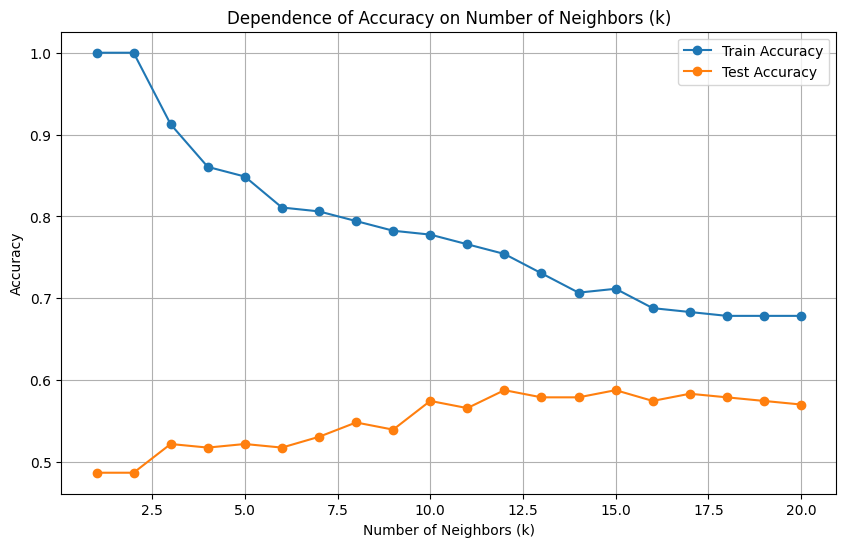

In [5]:
Graphics.draw(x_train, y_train, x_test, y_test)

Находим точность до Lowess

In [6]:
knn = Knn.KNN(k=13)
knn.fit(x_train, y_train)
y = knn.predict(x_test)
accuracy = accuracy_score(y_test, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5789473684210527


Применяем Lowess чтобы найти априорные веса

In [8]:
weights = Lowess.smooth(x_train, y_train)

Находим точность после Lowess

In [9]:
knn = Knn.KNN(k=13, weights=weights)
knn.fit(x_train, y_train)
y = knn.predict(x_test)
accuracy = accuracy_score(y_test, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5745614035087719


Точность стала немного ниже, но если 'пороллить' разбиение датасета, то можно получить незначительной рост точности. Такая ситуация (что Lowess снизил точность) могла произойти из-за того, что в алгоритме используется жесткая классификация и функция ошибок может принимать значения только 0 или 1.